In [16]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import math
from heapq import heappop, heappush
%matplotlib inline

In [17]:
import numpy as np
import pandas as pd

In [1]:
from search import wastar, bfs, EES, write_solution
from definitions import State
from heuristcs import manhattan_distance
import time

# grid_size = 10
# obstacles_positions = [[0,1],[0,2],[1,1],[1,2],[4,0],[4,2],[6,2],[2,4],[3,4],[4,4],[6,4],[2,5],[5,8],[3,6],[8,0],[9,0],[8,1],[9,1],[7,5],[7,6],[8,6]]
# dirt_positions = [[8,2],[6,7]]

# initial_position = [0,0]

# initial_state = State(initial_position, dirt_positions)

# start_time = time.time()
# bfs(initial_state, grid_size, obstacles_positions) #, manhattan_distance
# print("Execution time %s seconds." % (time.time() - start_time))

# #compare methods
import random
import numpy as np
import os, sys

# class HiddenPrints:
#     def __enter__(self):
#         self._original_stdout = sys.stdout
#         sys.stdout = open(os.devnull, 'w')

#     def __exit__(self, exc_type, exc_val, exc_tb):
#         sys.stdout.close()
#         sys.stdout = self._original_stdout

# grid_size = 10
# n_obstacles = 20
# initial_position = [0,0]

# bfs_times=[]
# bfs_checks=[]
# a_star_times=[]
# a_star_checks=[]

# repetitions = 100

# with HiddenPrints():
#     for i_rep in range(repetitions):
#         obstacles_positions = [[random.randint(1,10),random.randint(1,10)] for _ in range(n_obstacles) ]
#         dirt_positions = [[random.randint(0,10),random.randint(0,10)]]
#         while dirt_positions in obstacles_positions:
#             dirt_positions = [[random.randint(0,10),random.randint(0,10)]]

#         start_time = time.time()
#         solutions, costs, checks = bfs(initial_state, grid_size, obstacles_positions)
#         bfs_times.append(time.time() - start_time)
#         if checks:
#             bfs_checks.append(np.min(checks))

#         start_time = time.time()
#         solutions, costs, checks = a_star(initial_state, grid_size, obstacles_positions, manhattan_distance)
#         a_star_times.append(time.time() - start_time)
#         if checks:
#             a_star_checks.append(np.min(checks))
        

# print(f"Solution checks for bfs: {np.average(bfs_checks)} +- {(np.average(np.array(bfs_checks)**2)-np.average(bfs_checks)**2)/np.sqrt(repetitions-1)} seconds.")
# print(f"Solution checks for A*: {np.average(a_star_checks)}  +- {(np.average(np.array(a_star_checks)**2)-np.average(a_star_checks)**2)/np.sqrt(repetitions-1)} seconds.")

# print(f"Execution time for bfs: {np.average(bfs_times)} +- {(np.average(np.array(bfs_times)**2)-np.average(bfs_times)**2)/np.sqrt(repetitions-1)} seconds.")
# print(f"Execution time for A*: {np.average(a_star_times)}  +- {(np.average(np.array(a_star_times)**2)-np.average(a_star_times)**2)/np.sqrt(repetitions-1)} seconds.")


n = 70
n_obstacles = 300
obstacles_positions = [[random.randint(1,n),random.randint(1,n)] for _ in range(n_obstacles) ]

dirt_positions = []
for i in range(5):
    dirt = [random.randint(1,n),random.randint(1,n)]
    while dirt in obstacles_positions and dirt in dirt_positions:
        dirt = [random.randint(0,n),random.randint(0,n)]
    dirt_positions.append(dirt)

initial_position = [0,0]
initial_state = State(initial_position, dirt_positions)
        
print(dirt_positions)
start_time = time.time()
ees_res = EES(initial_state, n, obstacles_positions, w=2)
print(ees_res)
print(write_solution(ees_res[1]))
print("Execution time %s seconds." % (time.time() - start_time))

[[34, 3], [26, 46], [59, 67], [5, 22], [48, 55]]
(False, None, None, 36920, 68546)


AttributeError: 'NoneType' object has no attribute 'g'

In [ ]:
from search import wastar
start_time = time.time()
wa_res = wastar(initial_state, n, obstacles_positions, w=2)
print(wa_res)
print(write_solution(wa_res[1]))
print("Execution time %s seconds." % (time.time() - start_time))

In [5]:
from search import *


In [71]:
def count_nodes_dif_w():
    nodes_norm = [[], [], [], [], []]
    task_n = 0
    task_len = [[], [], [], [], []]
    task_time = [[], [], [], [], []]
    weights = [2, 3, 5, 7, 10]
    tasks = []
    
            
    for i in range(30):            
        n = 50
        n_obstacles = 100
        obstacles_positions = [[random.randint(1,n),random.randint(1,n)] for _ in range(n_obstacles) ]

        dirt_positions = []
        for i in range(6):
            dirt = [random.randint(1,n),random.randint(1,n)]
            while dirt in obstacles_positions and dirt in dirt_positions:
                dirt = [random.randint(0,n),random.randint(0,n)]
            dirt_positions.append(dirt)

        initial_position = [0,0]
        initial_state = State(initial_position, dirt_positions)

        for k, w in enumerate(weights):
            print("Going through weight", w)
            cur_task_nodes = []
            cur_task_times = []
            cur_task_len = []
            flag = False
            for j in range(2):
                if j == 0:
                    start_time = time.time()
                    result = EES(initial_state, n, obstacles_positions, w)
                    cur_time = time.time() - start_time
                    if not result[0]:
                        flag = True
                        break
                if j == 1:
                    start_time = time.time()
                    result = wastar(initial_state, n, obstacles_positions, w)
                    cur_time = time.time() - start_time
                nodes_created = result[4]
                length = result[2]
                cur_task_nodes.append(nodes_created)
                cur_task_times.append(cur_time)

            if not flag:
                max_node = max(cur_task_nodes)

                cur_task_nodes = [i / max_node for i in cur_task_nodes]
                nodes_norm[k].append(cur_task_nodes)
                task_time[k].append(cur_task_times)

        print("Gone through task", i)
            
    print("Tasks: {}".format(task_n))
    
    nodes_norm_mean = []
    for w_res in nodes_norm:
#         print(w_res)
        cur_nodes_mean = []
        for alg_ind in range(len(w_res[0])):
            w_i = [task[alg_ind] for task in w_res]
            cur_nodes_mean.append(np.mean(w_i))
        nodes_norm_mean.append(cur_nodes_mean)
        
    time_mean = []
    for w_res in task_time:
        print(w_res)
        cur_time_mean = []
        for alg_ind in range(len(w_res[0])):
            w_i = [task[alg_ind] for task in w_res]
            cur_time_mean.append(np.mean(w_i))
        time_mean.append(cur_time_mean)
        
    print("\n", nodes_norm_mean)
    return nodes_norm_mean, time_mean

In [38]:
def count_complexity(w):
    nodes_norm = []
    nodes = []
    steps_norm = []
    steps = []
    task_n = 0
    task_hard = []
    task_len = []
    correct_tasks = [0, 0, 0, 0]
    
    while task_n < 80:
        n = 50
        n_obstacles = 100
        obstacles_positions = [[random.randint(1,n),random.randint(1,n)] for _ in range(n_obstacles) ]

        dirt_positions = []
        for i in range(6):
            dirt = [random.randint(1,n),random.randint(1,n)]
            while dirt in obstacles_positions and dirt in dirt_positions:
                dirt = [random.randint(0,n),random.randint(0,n)]
            dirt_positions.append(dirt)

        initial_position = [0,0]
        initial_state = State(initial_position, dirt_positions)
        
        cur_task_nodes = []
        cur_task_steps = []
        cur_task_len = []

        path_found, res_node, length, cur_steps, nodes_created = wastar(initial_state, 50, obstacles_positions, 10, phi)
        if not path_found:
            continue
            
        task_n += 1
#         result = wastar(initial_state, 50, obstacles_positions, 1, phi)
#         number_of_steps = result[3]
#         nodes_created = result[4]
#         length = result[2]
# #         correct = (length - task[8] < 0.01)
# #         if correct:
# #             correct_tasks[0] += 1
#         cur_task_nodes.append(nodes_created)
#         cur_task_steps.append(number_of_steps)
#         task_hard.append(length)
#         cur_task_len.append(length)
        

        for j in range(4):
            if j == 0:
                result = wastar(initial_state, 50, obstacles_positions, w, phi)
            if j == 1:
                result = wastar(initial_state, 50, obstacles_positions, w, phi_xdp)
            if j == 2:
                result = wastar(initial_state, 50, obstacles_positions, w, phi_xup)
            if j == 3:
                result = EES(initial_state, 50, obstacles_positions, w)
            number_of_steps = result[3]
            nodes_created = result[4]
            length = result[2]
#             correct = (length - task[8] < 0.01)
#             if correct:
#                 correct_tasks[j + 1] += 1
            cur_task_nodes.append(nodes_created)
            cur_task_steps.append(number_of_steps)
            cur_task_len.append(length)

        max_steps = max(cur_task_steps)
        max_nodes = max(cur_task_nodes)
        nodes.append(cur_task_nodes)
        steps.append(cur_task_steps)
        cur_task_nodes = [i / max_nodes for i in cur_task_nodes]
        cur_task_steps = [i / max_steps for i in cur_task_steps]
        max_len = max(cur_task_len)
        task_hard.append(min(cur_task_len))
        cur_task_len = [i / max_len for i in cur_task_len]
        task_len.append(cur_task_len)
        nodes_norm.append(cur_task_nodes)
        steps_norm.append(cur_task_steps)
        print("Going through task {}".format(task_n))
    print("Tasks: {}".format(task_n))
    return nodes_norm, steps_norm, task_hard, nodes, steps, task_len, correct_tasks

In [39]:
def draw_box_plot(nodes_norm, task_lens):
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Nodes count')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(4):
        data_nodes.append([el[i] for el in nodes_norm])
    bp = ax.boxplot(data_nodes, labels=["WA*", "XDP", "XUP", "EES"])
    plt.ylabel('Normalised nodes count')
    plt.show()
    
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Path length')
    ax = fig.add_axes([0, 0, 1, 1])
    data_nodes = []
    for i in range(4):
        data_nodes.append([el[i] for el in task_lens])
    bp = ax.boxplot(data_nodes, labels=["WA*", "XDP", "XUP", "EES"])
    plt.ylabel('Normalised path length')
    plt.show()

In [48]:
def draw_scatter(nodes_norm, tasks_hard, task_lens):
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Nodes count / path length')
    ax = fig.add_axes([0, 0, 1, 1])
    names = ["WA*", "XDP", "XUP", "EES"]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in range(4):
        z = np.polyfit(tasks_hard, [el[i] for el in nodes_norm], 1)
        p = np.poly1d(z)
        ax.scatter(tasks_hard, [el[i] for el in nodes_norm], alpha=0.2, color=colors[i])
        ax.plot(tasks_hard, p(tasks_hard), label=names[i], linewidth=2.0, color=colors[i])
    plt.xlabel('Shortest path')
    plt.ylabel('Nodes created')
    ax.legend()
    plt.show()
    
    fig = plt.figure(figsize =(8, 5))
    fig.suptitle('Task lens / path length')
    ax = fig.add_axes([0, 0, 1, 1])
    names = ["WA*", "XDP", "XUP", "EES"]
    for i in range(4):
        z = np.polyfit(tasks_hard, [el[i] for el in task_lens], 1)
        p = np.poly1d(z)
        ax.plot(tasks_hard, p(tasks_hard), linewidth=1.5, label=names[i], color=colors[i])
    plt.xlabel('Shortest path')
    plt.ylabel('Length of found path')
    ax.legend()
    plt.show()

In [41]:
nodes_norm, steps_norm, tasks_hard, nodes, steps, task_lens, correct_tasks = count_complexity(5)

Going through task 1
Going through task 2
Going through task 3
Going through task 4
Going through task 5
Going through task 6
Going through task 7
Going through task 8
Going through task 9
Going through task 10
Going through task 11
Going through task 12
Going through task 13
Going through task 14
Going through task 15
Going through task 16
Going through task 17
Going through task 18
Going through task 19
Going through task 20
Going through task 21
Going through task 22
Going through task 23
Going through task 24
Going through task 25
Going through task 26
Going through task 27
Going through task 28
Going through task 29
Going through task 30
Going through task 31
Going through task 32
Going through task 33
Going through task 34
Going through task 35
Going through task 36
Going through task 37
Going through task 38
Going through task 39
Going through task 40
Going through task 41
Going through task 42
Going through task 43
Going through task 44
Going through task 45
Going through task 

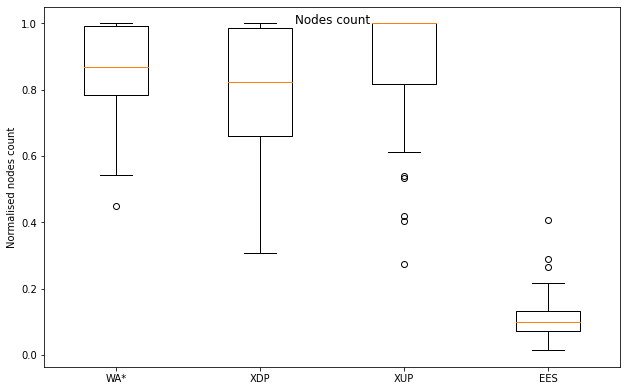

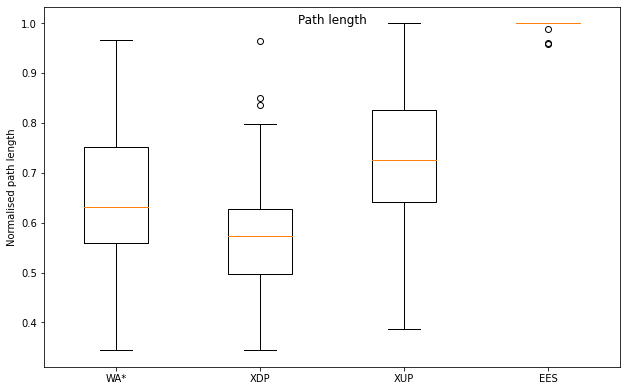

In [43]:
draw_box_plot(nodes_norm, task_lens)

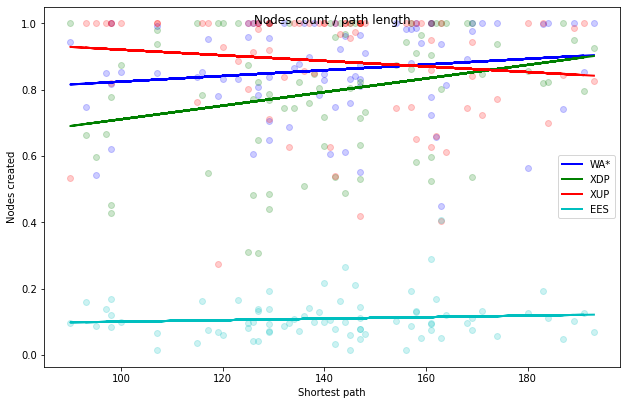

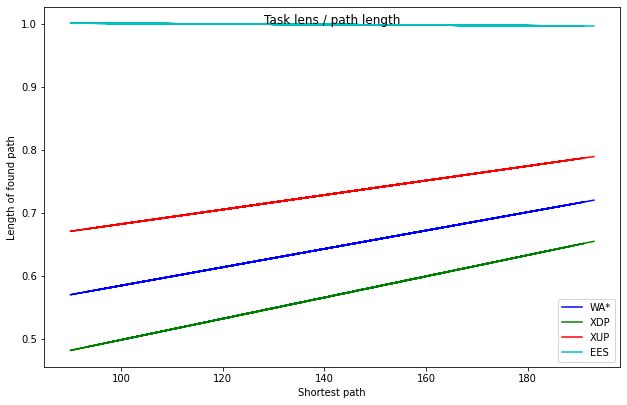

In [49]:
draw_scatter(nodes_norm, tasks_hard, task_lens)

In [72]:
import pandas as pd
def draw_df_dif_w(nodes_norm):
    df = pd.DataFrame(index=['w=2', 'w=3', 'w=5', 'w=7', 'w=10'])
    
    df.style.set_table_attributes('style="font-size: 22px"')
#     a_nodes = [i[0] for i in nodes_norm]
#     a_steps = [i[0] for i in steps_norm]
#     a_lens = [i[0] for i in task_lens]
#     df["A*"] = [
#         correct_tasks[0] / tasks_num,
#         np.mean(a_lens),
#         np.mean(a_nodes),
#         np.mean(a_steps),
#     ]
    
    w_nodes = [i[0] for i in nodes_norm]
    df["EES"] = [
        i[0] for i in nodes_norm
    ]
    
    df["WA*"] = [
        i[1] for i in nodes_norm
    ]
    
    
#     df.iloc[2] /= np.max(df.iloc[2])
#     df.iloc[3] /= np.max(df.iloc[3])
    return df.style.set_properties(**{
    'font-size': '17pt',
})

In [73]:
result = count_nodes_dif_w()

Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Going through weight 5
Going through weight 7
Going through weight 10
Gone through task 5
Going through weight 2
Going through weight 3
Go

In [74]:
draw_df_dif_w(result[0])

,EES,WA*
w=2,0.887934,0.561799
w=3,0.363460,0.968491
w=5,0.120717,1.000000
w=7,0.132487,1.000000
w=10,0.136198,1.000000


In [75]:
draw_df_dif_w(result[1])

,EES,WA*
w=2,6.308011,1.600752
w=3,1.165784,2.160082
w=5,0.406314,2.204721
w=7,0.429458,2.142957
w=10,0.409354,2.041258
